In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["font.size"] = 12


In [ ]:

# Load data
uw_path = "pkl_data/UW.pkl"
grape_path = "pkl_data/GRAPE.pkl"

uw_df = pd.read_pickle(uw_path)
grape_df = pd.read_pickle(grape_path)

print("UW shape:", uw_df.shape)
print("GRAPE shape:", grape_df.shape)

print("\nUW columns:")
print(uw_df.columns.tolist())

print("\nGRAPE columns:")
print(grape_df.columns.tolist())


UW shape: (7428, 19)
GRAPE shape: (263, 9)

UW columns:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

GRAPE columns:
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
# Quick inspection
print("UW columns type:", type(uw_df.columns[0]))
print("UW head:")
display(uw_df.head(2))
print("\nGRAPE head:")
display(grape_df.head(2))

UW columns type: <class 'numpy.int64'>
UW head:


Visit Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,,,,,,,,,,,,,,,,,,,
1-OD,"[10, 9, -1, 10, 21, 24, 21, 18, 20, 19, 17, 23...","[19, 20, 22, 20, 19, 24, 22, 24, 25, 23, 17, 2...","[15, 23, 20, 21, 26, 24, 26, 28, 26, 25, 19, 2...","[13, 16, 11, 6, 5, 22, 24, 20, 23, 23, 18, 23,...","[21, 19, 19, 14, 19, 24, 23, 17, 21, 22, 17, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-OS,"[-1, 17, -1, -1, 19, 23, 18, 18, 25, 20, 18, 2...","[11, -1, 8, -1, 10, 17, 20, 19, 21, 25, 16, 22...","[11, 9, -1, 10, 22, 23, 21, 10, 23, 18, 19, 24...","[7, -1, 3, -1, 15, 21, 14, 15, 18, 15, 15, 22,...","[9, 10, -1, 16, 19, 22, 23, 18, 23, 21, 11, 24...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



GRAPE head:


Visit Number,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
1-OD,"[21, 22, 20, 23, 24, 25, 14, 25, 25, 20, 18, 2...","[31, 28, 28, 29, 28, 27, 28, 30, 28, 24, 23, 2...","[26, 25, 26, 27, 26, 25, 22, 28, 25, 26, 23, 2...",NaN,NaN,NaN,NaN,NaN,NaN
1-OS,"[24, 26, 23, 26, 26, 27, 23, 26, 28, 26, 24, 2...","[30, 27, 27, 27, 27, 26, 27, 27, 27, 24, 23, 2...","[31, 29, 27, 28, 28, 28, 27, 28, 27, 28, 25, 2...","[29, 32, 24, 26, 29, 30, 27, 20, 31, 31, 24, 2...",NaN,NaN,NaN,NaN,NaN


In [ ]:

# Understand the data structure

# UW: Each row is a visit, columns are integer indices for VF points
# GRAPE: Each row is a patient-eye, columns are visit numbers containing VF arrays

print("UW structure: rows are visits, columns likely include VF fields + MS + MS_slope")
print("UW columns:", list(uw_df.columns))
print("\nGRAPE structure: rows are patient-eyes, columns are visit numbers")
print("GRAPE columns:", list(grape_df.columns))

print("\nUW sample row:")
display(uw_df.iloc[0])


UW structure: rows are visits, columns likely include VF fields + MS + MS_slope
UW columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

GRAPE structure: rows are patient-eyes, columns are visit numbers
GRAPE columns: [1, 2, 3, 4, 5, 6, 7, 8, 9]

UW sample row:


Visit Number
1     [10, 9, -1, 10, 21, 24, 21, 18, 20, 19, 17, 23...
2     [19, 20, 22, 20, 19, 24, 22, 24, 25, 23, 17, 2...
3     [15, 23, 20, 21, 26, 24, 26, 28, 26, 25, 19, 2...
4     [13, 16, 11, 6, 5, 22, 24, 20, 23, 23, 18, 23,...
5     [21, 19, 19, 14, 19, 24, 23, 17, 21, 22, 17, 2...
6     [23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                                  NaN
18                                 

In [ ]:

# Transform data 

def transform_df_to_visits(df):
    """
    Transform the pkl format (rows=eyes, cols=visits with VF arrays)
    into a long format (one row per visit with VF features).
    """
    rows = []
    for eye_id in df.index:
        for visit_num in df.columns:
            vf_data = df.loc[eye_id, visit_num]
            # Check if it's NaN using different approach
            if not isinstance(vf_data, (list, np.ndarray)):
                continue
            row_dict = {"eye_id": eye_id, "visit_num": visit_num}
            # Add each VF point as a feature
            for i, val in enumerate(vf_data):
                row_dict[f"VF_{i+1}"] = val
            rows.append(row_dict)
    return pd.DataFrame(rows)

print("Transforming UW data...")
uw_visits = transform_df_to_visits(uw_df)
print(f"UW: {len(uw_df)} eyes -> {len(uw_visits)} visits")
display(uw_visits.head())

print("\nTransforming GRAPE data...")
grape_visits = transform_df_to_visits(grape_df)
print(f"GRAPE: {len(grape_df)} eyes -> {len(grape_visits)} visits")
display(grape_visits.head())

Transforming UW data...
UW: 7428 eyes -> 28943 visits
UW: 7428 eyes -> 28943 visits


,eye_id,visit_num,VF_1,VF_2,VF_3,VF_4,VF_5,VF_6,VF_7,VF_8,...,VF_45,VF_46,VF_47,VF_48,VF_49,VF_50,VF_51,VF_52,VF_53,VF_54
0,1-OD,1,10,9,-1,10,21,24,21,18,...,22,28,26,26,26,26,19,17,23,26
1,1-OD,2,19,20,22,20,19,24,22,24,...,25,27,25,26,25,25,24,23,25,23
2,1-OD,3,15,23,20,21,26,24,26,28,...,26,24,26,29,30,29,20,24,22,23
3,1-OD,4,13,16,11,6,5,22,24,20,...,18,28,29,26,27,29,22,24,26,26
4,1-OD,5,21,19,19,14,19,24,23,17,...,26,27,26,26,28,27,24,26,26,27



Transforming GRAPE data...
GRAPE: 263 eyes -> 1115 visits


,eye_id,visit_num,VF_1,VF_2,VF_3,VF_4,VF_5,VF_6,VF_7,VF_8,...,VF_51,VF_52,VF_53,VF_54,VF_55,VF_56,VF_57,VF_58,VF_59,VF_60
0,1-OD,1,21,22,20,23,24,25,14,25,...,20,22,21,23,26,14,13,19,20,21
1,1-OD,2,31,28,28,29,28,27,28,30,...,20,22,17,22,16,12,14,21,21,18
2,1-OD,3,26,25,26,27,26,25,22,28,...,20,19,12,20,12,5,20,22,25,22
3,1-OS,1,24,26,23,26,26,27,23,26,...,21,22,21,21,21,23,25,22,25,22
4,1-OS,2,30,27,27,27,27,26,27,27,...,27,23,20,22,22,21,20,21,24,25


In [ ]:

# 5: Compute MS and slopes for UW


# Get VF columns
vf_cols = [c for c in uw_visits.columns if c.startswith("VF_")]
print(f"Found {len(vf_cols)} VF points")

# Compute MS for each visit ignored -1 values
def compute_ms(row):
    vals = row[vf_cols].values
    valid = vals[vals != -1]
    return valid.mean() if len(valid) > 0 else np.nan

uw_visits["MS"] = uw_visits.apply(compute_ms, axis=1)

# Compute slope per eye
uw_slopes = []
for eye_id in uw_visits["eye_id"].unique():
    eye_data = uw_visits[uw_visits["eye_id"] == eye_id].sort_values("visit_num")
    eye_data = eye_data.dropna(subset=["MS"])  # Drop visits with no valid MS
    
    if len(eye_data) < 2:
        continue
    
    # Fit linear regression: MS ~ visit_num
    X = eye_data["visit_num"].values.reshape(-1, 1)
    y = eye_data["MS"].values
        
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]
    
    # Get baseline (first visit) data
    baseline = eye_data.iloc[0]
    row_dict = {"eye_id": eye_id, "MS_slope": slope, "baseline_MS": baseline["MS"]}
    for col in vf_cols:
        row_dict[f"baseline_{col}"] = baseline[col]
    uw_slopes.append(row_dict)

uw_slopes_df = pd.DataFrame(uw_slopes)
print(f"UW slopes computed for {len(uw_slopes_df)} eyes")
display(uw_slopes_df.head())

Found 54 VF points
UW slopes computed for 7393 eyes
UW slopes computed for 7393 eyes


,eye_id,MS_slope,baseline_MS,baseline_VF_1,baseline_VF_2,baseline_VF_3,baseline_VF_4,baseline_VF_5,baseline_VF_6,baseline_VF_7,...,baseline_VF_45,baseline_VF_46,baseline_VF_47,baseline_VF_48,baseline_VF_49,baseline_VF_50,baseline_VF_51,baseline_VF_52,baseline_VF_53,baseline_VF_54
0,1-OD,0.614745,21.905660,10,9,-1,10,21,24,21,...,22,28,26,26,26,26,19,17,23,26
1,1-OS,-0.529574,24.568627,-1,17,-1,-1,19,23,18,...,26,25,27,26,28,26,20,21,24,26
2,1000-OD,-1.856608,24.566038,23,23,23,20,25,26,24,...,24,24,26,24,25,27,22,21,24,24
3,1000-OS,-1.501548,21.692308,16,21,15,16,19,11,-1,...,22,20,20,21,21,18,17,19,18,18
4,1002-OD,0.350370,29.641509,29,26,26,27,28,29,31,...,28,31,31,31,31,30,23,27,24,29


In [ ]:

# 6: Compute MS and slopes for GRAPE

grape_visits["MS"] = grape_visits.apply(compute_ms, axis=1)

# Compute slope per eye
grape_slopes = []
for eye_id in grape_visits["eye_id"].unique():
    eye_data = grape_visits[grape_visits["eye_id"] == eye_id].sort_values("visit_num")
    eye_data = eye_data.dropna(subset=["MS"])
    
    if len(eye_data) < 2:
        continue
    
    X = eye_data["visit_num"].values.reshape(-1, 1)
    y = eye_data["MS"].values
        
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]
    
    baseline = eye_data.iloc[0]
    row_dict = {"eye_id": eye_id, "MS_slope": slope, "baseline_MS": baseline["MS"]}
    for col in vf_cols:
        row_dict[f"baseline_{col}"] = baseline[col]
    grape_slopes.append(row_dict)

grape_slopes_df = pd.DataFrame(grape_slopes)
print(f"GRAPE slopes computed for {len(grape_slopes_df)} eyes")
display(grape_slopes_

GRAPE slopes computed for 263 eyes


,eye_id,MS_slope,baseline_MS,baseline_VF_1,baseline_VF_2,baseline_VF_3,baseline_VF_4,baseline_VF_5,baseline_VF_6,baseline_VF_7,...,baseline_VF_45,baseline_VF_46,baseline_VF_47,baseline_VF_48,baseline_VF_49,baseline_VF_50,baseline_VF_51,baseline_VF_52,baseline_VF_53,baseline_VF_54
0,1-OD,0.160377,19.962264,21,22,20,23,24,25,14,...,16,18,19,20,21,19,20,22,21,23
1,1-OS,0.003774,23.735849,24,26,23,26,26,27,23,...,22,21,22,25,27,23,21,22,21,21
2,10-OD,-0.907547,25.830189,31,30,29,29,29,30,28,...,23,14,12,24,18,23,28,27,23,24
3,10-OS,-1.449057,27.037736,32,31,29,30,30,29,30,...,24,21,26,24,20,23,28,24,27,26
4,100-OD,0.016981,20.113208,29,32,29,30,16,26,26,...,18,19,19,22,27,23,22,24,21,10


In [ ]:

#7: Prepare training data and train Random Forest

# Features: baseline VF values + baseline MS
baseline_vf_cols = [f"baseline_{c}" for c in vf_cols]
feature_cols = baseline_vf_cols + ["baseline_MS"]

uw_X = uw_slopes_df[feature_cols]
uw_y = uw_slopes_df["MS_slope"]

print(f"Training on {len(uw_X)} UW eyes")
print(f"Features: {len(feature_cols)}")

rfr = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
)

rfr.fit(uw_X, uw_y)
print("Random Forest trained!")

# In-sample performance
uw_pred = rfr.predict(uw_X)
print(f"\nUW in-sample performance:")
print(f"  MAE:  {mean_absolute_error(uw_y, uw_pred):.3f} dB/visit")
print(f"  RMSE: {np.sqrt(mean_squared_error(uw_y, uw_pred)):.3f} dB/visit")
print(f"  R squared:   {r2_score(uw_y, uw_pred):.3f}")

Training on 7393 UW eyes
Features: 55
Random Forest trained!

UW in-sample performance:
  MAE:  0.407 dB/visit
  RMSE: 0.723 dB/visit
  R squared:   0.871
Random Forest trained!

UW in-sample performance:
  MAE:  0.407 dB/visit
  RMSE: 0.723 dB/visit
  R squared:   0.871


=== Cross-dataset: UW model on GRAPE (263 eyes) ===
  MAE:  0.971 dB/visit
  RMSE: 1.397 dB/visit
  R²:   -1.016


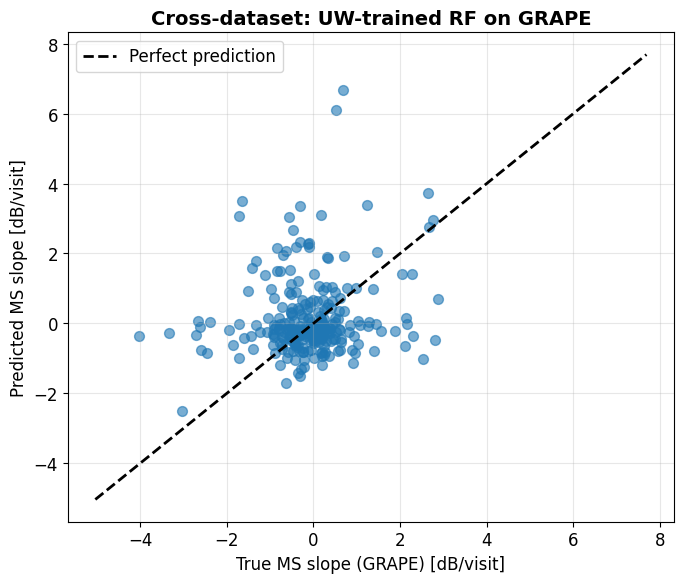

In [ ]:

# 8: Evaluate on GRAPE

grape_X = grape_slopes_df[feature_cols]
grape_y = grape_slopes_df["MS_slope"]

grape_pred = rfr.predict(grape_X)

print(f"=== Cross-dataset: UW model on GRAPE ({len(grape_X)} eyes) ===")
print(f"  MAE:  {mean_absolute_error(grape_y, grape_pred):.3f} dB/visit")
print(f"  RMSE: {np.sqrt(mean_squared_error(grape_y, grape_pred)):.3f} dB/visit")
print(f"  R²:   {r2_score(grape_y, grape_pred):.3f}")

# Scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(grape_y, grape_pred, alpha=0.6, s=50)
lims = [min(grape_y.min(), grape_pred.min()) - 1, max(grape_y.max(), grape_pred.max()) + 1]
plt.plot(lims, lims, "k--", linewidth=2, label="Perfect prediction")
plt.xlabel("True MS slope (GRAPE) [dB/visit]", fontsize=12)
plt.ylabel("Predicted MS slope [dB/visit]", fontsize=12)
plt.title("Cross-dataset: UW-trained RF on GRAPE", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()